# CLUSTERING

## KMeans

In [4]:
from sklearn.cluster import KMeans
import pyreadr
import matplotlib.pyplot as plt
import numpy as np

Import R data in python using pyreadr and put them in a dataframe

In [5]:
data = pyreadr.read_r('syntdata0.RDS')
df = data[None]
df

,0,1
0,10.268548,5.160963
1,10.171765,4.608081
2,10.218156,5.787864
3,10.231643,5.321450
4,10.220213,5.044880
...,...,...
145,11.004996,5.522664
146,10.901687,5.833739
147,10.797328,6.862563
148,10.870361,6.097340


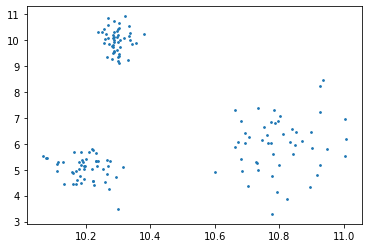

In [120]:
plt.scatter(df[0], df[1], s=3)

Definition of the kmeans algorithm, an implementation of the representative-based algorithms for clustering. It's based on the euclidean distance, the clusters are created in one shot and are flat.

In [121]:
kmeans = KMeans(n_clusters=3).fit(df)

In [122]:
#get the clusters centers
centers = kmeans.cluster_centers_
print('The centers are: ')
for x, y in centers:
    print('c_%d = (%f, %f)' %(np.argwhere(centers==x)[0][0], x, y))

The centers are: 
c_0 = (10.354499, 5.001361)
c_1 = (10.308000, 9.958170)
c_2 = (10.803539, 6.533277)


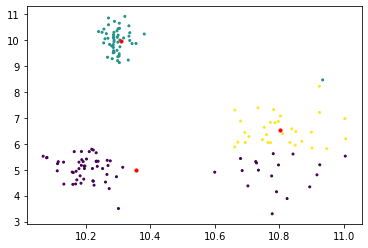

In [123]:
#plot the clustering results and the cluster centers
pred = kmeans.predict(df)
plt.scatter(df[0], df[1], c = pred, s=4)
plt.scatter(centers[:,0], centers[:,1], s=10, c='red')
plt.show()

In [124]:
#plot some info
print('The data labels are: ', kmeans.labels_)
print('An estimation of the loss based on the sum of squared distances of samples to their closest cluster center is: ', kmeans.inertia_)
print('The number of iterations needed to obtain the result is: ', kmeans.n_iter_)
print('The number of features found is: ', kmeans.n_features_in_)

The data labels are:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 0 0 2 0 0 2
 2 2 0 2 2 2 2 0 2 2 2 2 2 0 2 2 0 2 2 2 0 0 2 2 2 1 0 0 2 0 2 0 2 2 0 2 2
 2 0]
An estimation of the loss based on the sum of squared distances of samples to their closest cluster center is:  44.99846880233322
The number of iterations needed to obtain the result is:  3
The number of features found is:  2


The data are labeled incorrectly and the reason is that they are all in a small region on the x axis, as shown below.

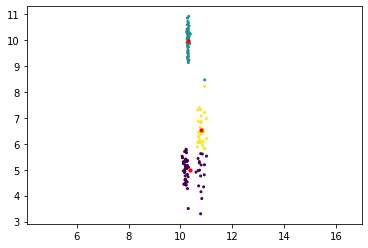

In [125]:
plt.scatter(df[0], df[1], c = pred, s=4)
plt.scatter(centers[:,0], centers[:,1], s=10, c='red')
plt.axis('equal')
plt.show()

To avoid this problem we can normalize data during preprocessing and apply the label found in this way to the original data

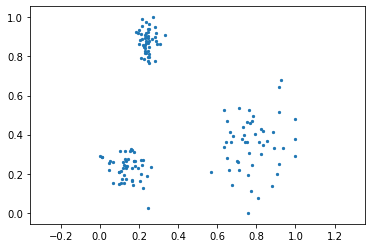

In [10]:
from sklearn import preprocessing
import pandas as pd

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled)
plt.scatter(df_scaled[0].values, df_scaled[1].values, s=5)
plt.axis('equal')
plt.show()

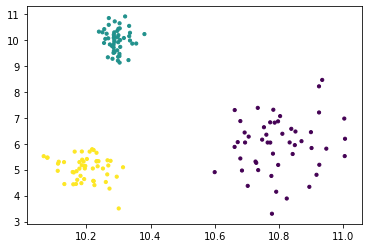

In [92]:
kmeans_scaled = KMeans(n_clusters=3).fit(df_scaled)
#plot the clustering results and the cluster centers
new_pred = kmeans_scaled.predict(df_scaled)
plt.scatter(df[0], df[1], c = new_pred, s=10)
plt.show()

CONCLUSION: pay attention to the scale between different different variables and rescale to give them the same importance (unless we want to give them different importance for some reason)

## Hierarchical clustering

In [28]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
import time

In [96]:
cluster = AgglomerativeClustering(n_clusters=3, linkage='complete', compute_distances=True)

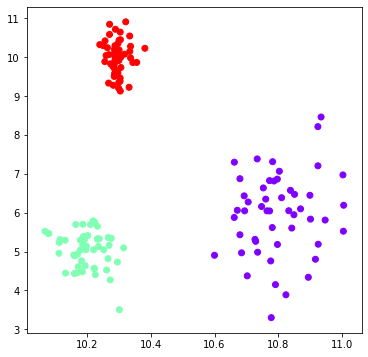

In [97]:
pred = cluster.fit_predict(df_scaled)
plt.figure(figsize =(6, 6))
plt.scatter(df[0].values, df[1].values, c=pred, cmap ='rainbow')
plt.show()

The main difference is that now the process is hierarchical and not flat, so it's possible to see the progress at each step. \
We can plot the dendogram to see how the split is done

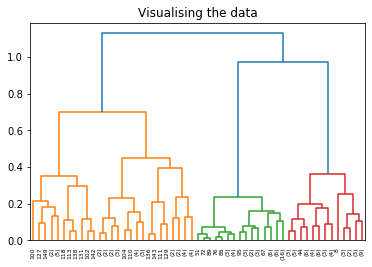

In [95]:
import scipy.cluster.hierarchy as shc
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(df_scaled, method ='complete')), p=5, truncate_mode='level')
#p is the maximum number of levels shown

We can also see the division on data at each step, here done both as a gif and as successive images

In [61]:
from matplotlib.animation import FuncAnimation, PillowWriter

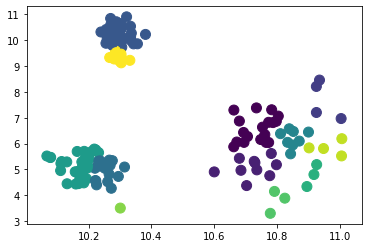

In [65]:
def update_plot(i, pred, scat):
    cluster = AgglomerativeClustering(n_clusters=12-i, linkage='complete').fit(df_scaled)
    pred2 = cluster.fit_predict(df_scaled)
    scat.set_array(pred2)
    return scat,

fig  = plt.figure()
cluster = AgglomerativeClustering(n_clusters=15, linkage='complete').fit(df_scaled)
pred = cluster.fit_predict(df_scaled)
scat = plt.scatter(df[0].values, df[1].values, s=100)
scat.set_array(pred)

ani = FuncAnimation(fig, update_plot, frames=range(10),
                                fargs=(pred, scat), interval=2000)

from matplotlib.animation import PillowWriter
ani.save("cluster.gif", writer=PillowWriter(fps=1))

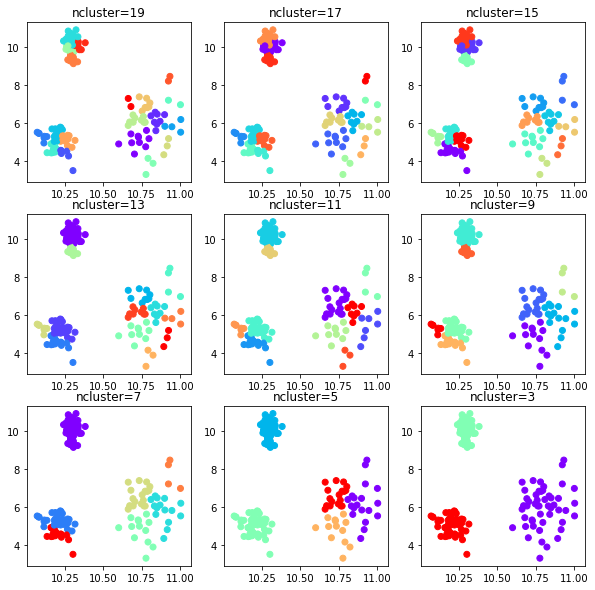

In [91]:
fig, axs = plt.subplots(3, 3, figsize=(10,10))
for i in range(3):
       for j in range(3):
              k = 19 - (i*3+j)*2
              ac2 = AgglomerativeClustering(n_clusters = k)
              axs[i, j].scatter(df[0], df[1], 
                            c = ac2.fit_predict(df_scaled), cmap ='rainbow')
              axs[i, j].set_title('ncluster='+ str(k))